# Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch
from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to
acquire a new customer than to retain an existing one, customer retention has now become even more
important than customer acquisition.


# Understanding and Defining Churn
In the telecom industry, customers are able to choose from multiple service providers and actively switch
from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to
acquire a new customer than to retain an existing one, customer retention has now become even more
important than customer acquisition.


# Telecom Churn Prediction
The solution code is divided into the following sections: 
* Data understanding
* Preprocessing
* EDA
* Handle missing values
* Feature Engineering
* Model 1 - Customer Churn Prediction
    * Feature Selection and Dimensionality Reduction using PCA
    * Handling Class Imbalance using ADASYN
    * Baseline Model building
    * Cross validation
    * Hyperparameter tuning 
    * Model Evaluation
    * Model Selection
    
* Strategy recommendation to manage customer churn

Steps involved in Model Deployment:
Data Analysis (EDA)
Data Preprocessing.
Feature Engineering.
Feature Selection (SelectKBest)
Fit into Algorithm (ML Algorithm)
Hyper Parameter Tunning (RandomSearchCV)
Dump model (Pickle)
Creating Web Application using Flask
Deployed in Web using heroku platform

# Load libraries

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)


# Data Understanding

* Load the dataset(telecom_churn_data.csv) file from the data folder. 
* Once we read the data in, print the first 5 lines of the DataFrame.

In [2]:
# read data
churn=pd.read_csv('telecom_churn_data.csv')

## Basic checks

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

We can start to see some useful patterns in the dataset.

* mobile_number is the unique_id column for each customer.
* columns are segregated by months of jun(6), jul(7), aug(8), sep(9) for the year 2014.

In [4]:
churn.shape

(99999, 226)

In [5]:
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Duplicate check

In [7]:
# duplicate check - no duplicate record found
any(churn.duplicated())

False

### Classify the churn and non-churn customers

In [8]:
# creating the churn column
churn['churn'] = churn['total_ic_mou_9'] + churn['total_og_mou_9'] + churn['vol_2g_mb_9'] + churn['vol_3g_mb_9']
churn['churn'] = churn['churn'].apply(lambda x: 0 if x > 0 else 1)
churn['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

To tag the churned customers,
* Take the columns such as 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'
* Find the sum of above columns values for each records
* Tag the customer record as Churned(1) if the sum value is 0 else Non-Churned(0) and derive the Churn column

In [9]:
'''
Method Name : get_cols_split
Input(s)    : 1 DataFrame
Output(s)   : 6 lists  
Description :
- This method reads the columns in the given dataframe and splits them into various categories such as months, date related cols 
  and other common cols  
- Then returns the column lists as output for each of these categories. 
'''
def get_cols_split(df):

    col_len = len(df.columns)

    jun_cols = []
    jul_cols = []
    aug_cols = []
    sep_cols = []
    common_cols = []
    date_cols = []
    
    for i in range(0, col_len):
        if any(pd.Series(df.columns[i]).str.contains('_6|jun')):
            jun_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_7|jul')):
            jul_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_8|aug')):
            aug_cols.append(df.columns[i])
        elif any(pd.Series(df.columns[i]).str.contains('_9|sep')):
            sep_cols.append(df.columns[i])
        else:
            common_cols.append(df.columns[i])
        
        if any(pd.Series(df.columns[i]).str.contains('date')):
            date_cols.append(df.columns[i])
            
    return jun_cols,jul_cols,aug_cols,sep_cols,common_cols,date_cols

In [10]:
'''
Method Name : get_cols_sub_split
Input(s)    : 1 list
Output(s)   : 4 lists  
Description :
- This method gets the columns list as input and splits them into various sub-categories such as call_usage, recharge columns, 
  incoming and outgoing related cols  
- Then returns the column lists as output for each of these sub-categories. 
'''
def get_cols_sub_split(col_list):
    call_usage_cols = []
    recharge_cols = []
    ic_usage_cols = []
    og_usage_cols = []

    call_usage_search_for = ['og','ic','mou']

    for i in range(0, len(col_list)):
        if any(pd.Series(col_list[i]).str.contains('|'.join(['rech','rch']))):
            recharge_cols.append(col_list[i])
        elif any(pd.Series(col_list[i]).str.contains('|'.join(call_usage_search_for))):
            call_usage_cols.append(col_list[i])

        if any(pd.Series(col_list[i]).str.contains('ic')):
            ic_usage_cols.append(col_list[i])
        elif any(pd.Series(col_list[i]).str.contains('og')):
            og_usage_cols.append(col_list[i])
            
    return call_usage_cols,recharge_cols,ic_usage_cols,og_usage_cols            

### Get only the high value customers

In [11]:
churn['avg_rech_6_7'] = (churn.total_rech_amt_6 + churn.total_rech_amt_7) / 2
churn=churn[churn['avg_rech_6_7']> churn['avg_rech_6_7'].quantile(0.70)]
churn.shape

(29979, 228)

To filter the high value customer records,

* Derive the column of average reacharge amount for Jun and Jul month(the good phase)
* Take only the records that is more than the 70th percentile of the average recharge amount.

#### Remove Sep month columns

In [12]:
# Get the columns split by months
jun_cols, jul_cols, aug_cols, sep_cols, common_cols, date_cols = get_cols_split(churn)

In [13]:
# Drop all the sep columns
churn.drop(sep_cols, axis=1, inplace=True)

#### Check for the unwanted columns and remove

In [14]:
# Get the unique count
for col in churn.columns:
    print(col, len(churn[col].unique()))

mobile_number 29979
circle_id 1
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
last_date_of_month_6 1
last_date_of_month_7 2
last_date_of_month_8 2
arpu_6 29230
arpu_7 29228
arpu_8 28376
onnet_mou_6 18806
onnet_mou_7 18934
onnet_mou_8 17598
offnet_mou_6 22441
offnet_mou_7 22639
offnet_mou_8 21500
roam_ic_mou_6 4338
roam_ic_mou_7 3649
roam_ic_mou_8 3654
roam_og_mou_6 5174
roam_og_mou_7 4431
roam_og_mou_8 4382
loc_og_t2t_mou_6 11150
loc_og_t2t_mou_7 11152
loc_og_t2t_mou_8 10770
loc_og_t2m_mou_6 16739
loc_og_t2m_mou_7 16865
loc_og_t2m_mou_8 16155
loc_og_t2f_mou_6 3252
loc_og_t2f_mou_7 3267
loc_og_t2f_mou_8 3124
loc_og_t2c_mou_6 1659
loc_og_t2c_mou_7 1750
loc_og_t2c_mou_8 1731
loc_og_mou_6 19677
loc_og_mou_7 19867
loc_og_mou_8 18872
std_og_t2t_mou_6 12773
std_og_t2t_mou_7 12982
std_og_t2t_mou_8 11781
std_og_t2m_mou_6 14512
std_og_t2m_mou_7 14583
std_og_t2m_mou_8 13320
std_og_t2f_mou_6 1774
std_og_t2f_mou_7 1715
std_og_t2f_mou_8 1627
std_og_t2c_mou_6 2
std_og_t2c_mou_7 2
std_og_t2c_mou_

We can observe from the above result that,

* Unique_ID column - mobile_number
* Less Info columns
    * circle_id
    * last_date_of_month_6
    * last_date_of_month_7
    * last_date_of_month_8
    * loc_og_t2o_mou
    * std_og_t2o_mou
    * loc_ic_t2o_mou
    * std_og_t2c_mou_6
    * std_og_t2c_mou_7
    * std_og_t2c_mou_8
    * std_ic_t2o_mou_6
    * std_ic_t2o_mou_7
    * std_ic_t2o_mou_8
    
Let's take a look at some sample records of the above columns.

In [15]:
churn[['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',\
           'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',\
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].head(5)

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
7,7000701601,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7001524846,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,7002191713,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,7000875565,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,7000187447,109,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Remove unwanted columns
churn.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',\
           'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',\
           'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace=True)

Now let's check for the recharge columns value.

# Handling Missing Values

In [17]:
(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

arpu_2g_6                   62.016745
night_pck_user_6            62.016745
av_rech_amt_data_6          62.016745
total_rech_data_6           62.016745
count_rech_2g_6             62.016745
max_rech_data_6             62.016745
fb_user_6                   62.016745
date_of_last_rech_data_6    62.016745
arpu_3g_6                   62.016745
count_rech_3g_6             62.016745
fb_user_7                   61.132793
night_pck_user_7            61.132793
count_rech_2g_7             61.132793
date_of_last_rech_data_7    61.132793
arpu_2g_7                   61.132793
av_rech_amt_data_7          61.132793
arpu_3g_7                   61.132793
total_rech_data_7           61.132793
max_rech_data_7             61.132793
count_rech_3g_7             61.132793
date_of_last_rech_data_8    60.835918
total_rech_data_8           60.835918
fb_user_8                   60.835918
max_rech_data_8             60.835918
arpu_3g_8                   60.835918
av_rech_amt_data_8          60.835918
count_rech_2

In [18]:
# Get the columns split to months
jun_cols, jul_cols, aug_cols, sep_cols, common_cols, date_cols = get_cols_split(churn)

In [19]:
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [20]:
# Get the columns sub split for each months
jun_call_usage_cols, jun_recharge_cols, jun_ic_usage_cols, jun_og_usage_cols = get_cols_sub_split(jun_cols)
jul_call_usage_cols, jul_recharge_cols, jul_ic_usage_cols, jul_og_usage_cols = get_cols_sub_split(jul_cols)
aug_call_usage_cols, aug_recharge_cols, aug_ic_usage_cols, aug_og_usage_cols = get_cols_sub_split(aug_cols)

In [21]:
jun_recharge_cols

['total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'avg_rech_6_7']

There are few missing values which we will start filling in one by one. 

fb_user and night_pack_user columns are of nominal type 0 and 1. Since missing values could be of another type, imputing them as 2.

In [22]:
# Filling the missing values of fb and night pack user columns as 2, as this could be an another type that was marked as NA
cols_6 = ['fb_user_6','night_pck_user_6']
cols_7 = ['fb_user_7','night_pck_user_7']
cols_8 = ['fb_user_8','night_pck_user_8']

churn[cols_6] = churn[cols_6].fillna(2)
churn[cols_7] = churn[cols_7].fillna(2)
churn[cols_8] = churn[cols_8].fillna(2)

The missing values for the below set of columns seem to be as data not available. So imputing them with 0.

In [23]:
# filling the missing values as 0
cols_6 = ['count_rech_3g_6','max_rech_data_6','av_rech_amt_data_6','arpu_3g_6','total_rech_data_6','count_rech_2g_6','arpu_2g_6']
cols_7 = ['count_rech_3g_7','max_rech_data_7','av_rech_amt_data_7','arpu_3g_7','total_rech_data_7','count_rech_2g_7','arpu_2g_7']
cols_8 = ['count_rech_3g_8','max_rech_data_8','av_rech_amt_data_8','arpu_3g_8','total_rech_data_8','count_rech_2g_8','arpu_2g_8']

churn[cols_6] = churn[cols_6].fillna(0)
churn[cols_7] = churn[cols_7].fillna(0)
churn[cols_8] = churn[cols_8].fillna(0)

In [24]:
# filling the missing values as 0 for month columns
churn[jun_call_usage_cols] = churn[jun_call_usage_cols].fillna(0)
churn[jul_call_usage_cols] = churn[jul_call_usage_cols].fillna(0)
churn[aug_call_usage_cols] = churn[aug_call_usage_cols].fillna(0)

Now let's check for the missing values count again.

In [25]:
(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

date_of_last_rech_data_6    62.016745
date_of_last_rech_data_7    61.132793
date_of_last_rech_data_8    60.835918
date_of_last_rech_8          1.981387
date_of_last_rech_7          0.380266
date_of_last_rech_6          0.206811
max_rech_data_8              0.000000
max_rech_data_7              0.000000
max_rech_data_6              0.000000
count_rech_2g_6              0.000000
total_rech_data_7            0.000000
total_rech_data_6            0.000000
count_rech_2g_7              0.000000
count_rech_2g_8              0.000000
count_rech_3g_6              0.000000
last_day_rch_amt_8           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_6           0.000000
total_rech_data_8            0.000000
arpu_6                       0.000000
count_rech_3g_8              0.000000
ic_others_8                  0.000000
spl_ic_mou_7                 0.000000
spl_ic_mou_8                 0.000000
isd_ic_mou_6                 0.000000
isd_ic_mou_7                 0.000000
isd_ic_mou_8

In [26]:
#churn.drop(columns=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)
# Drop all the sep columns
churn.drop(date_cols, axis=1, inplace=True)

Few date columns have some missing values. But let's leave that as is for now and will use that later point in time.

# EDA

#### Churn (Target Variable)

<AxesSubplot:xlabel='churn', ylabel='count'>

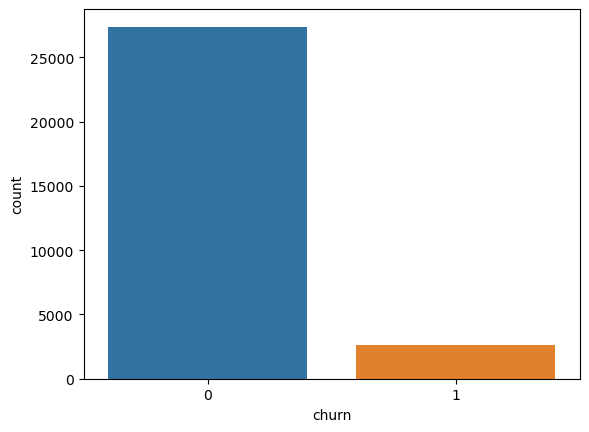

In [27]:
sns.countplot(x='churn', data=churn)

As we observed earlier, churn rate is low in the overall dataset. So we would need to handle the class imbalance.

#### Age on Network (aon)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aon'>

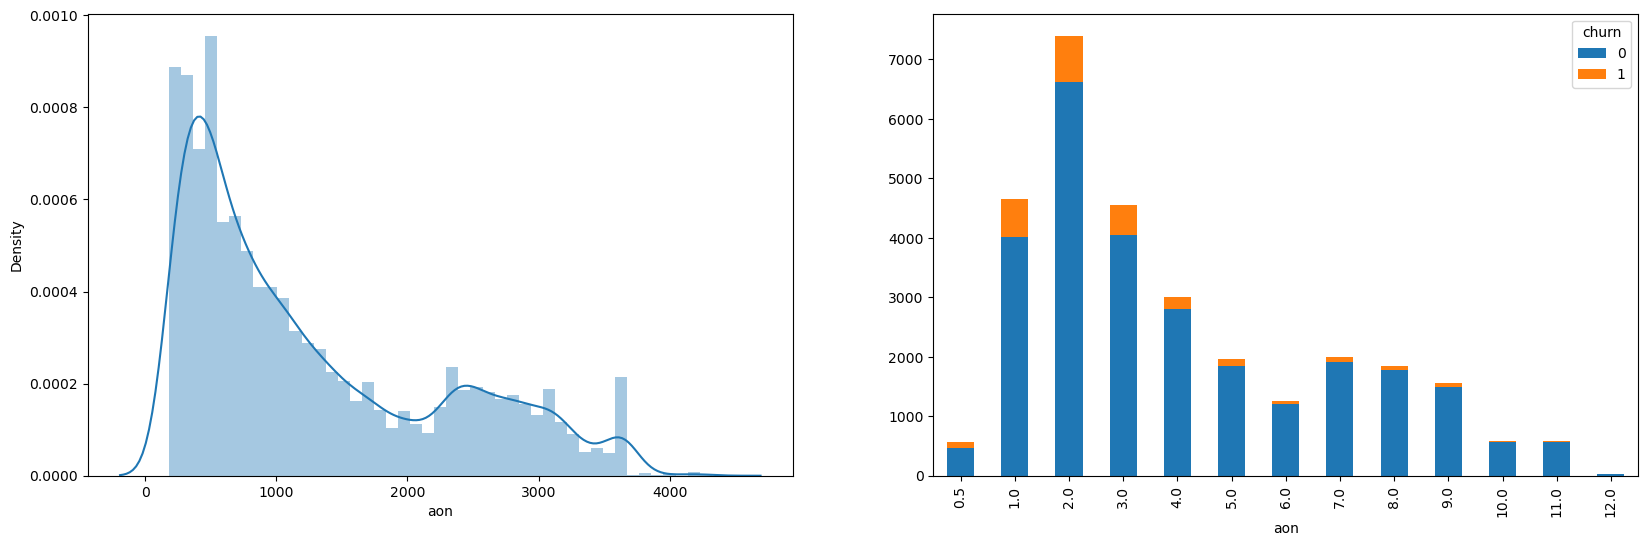

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(churn['aon'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((churn['aon']/30)/12),1), bins = bins, labels = labels ), churn['churn']).plot(kind='bar', stacked=True, ax = ax2)

### Correlation Analysis

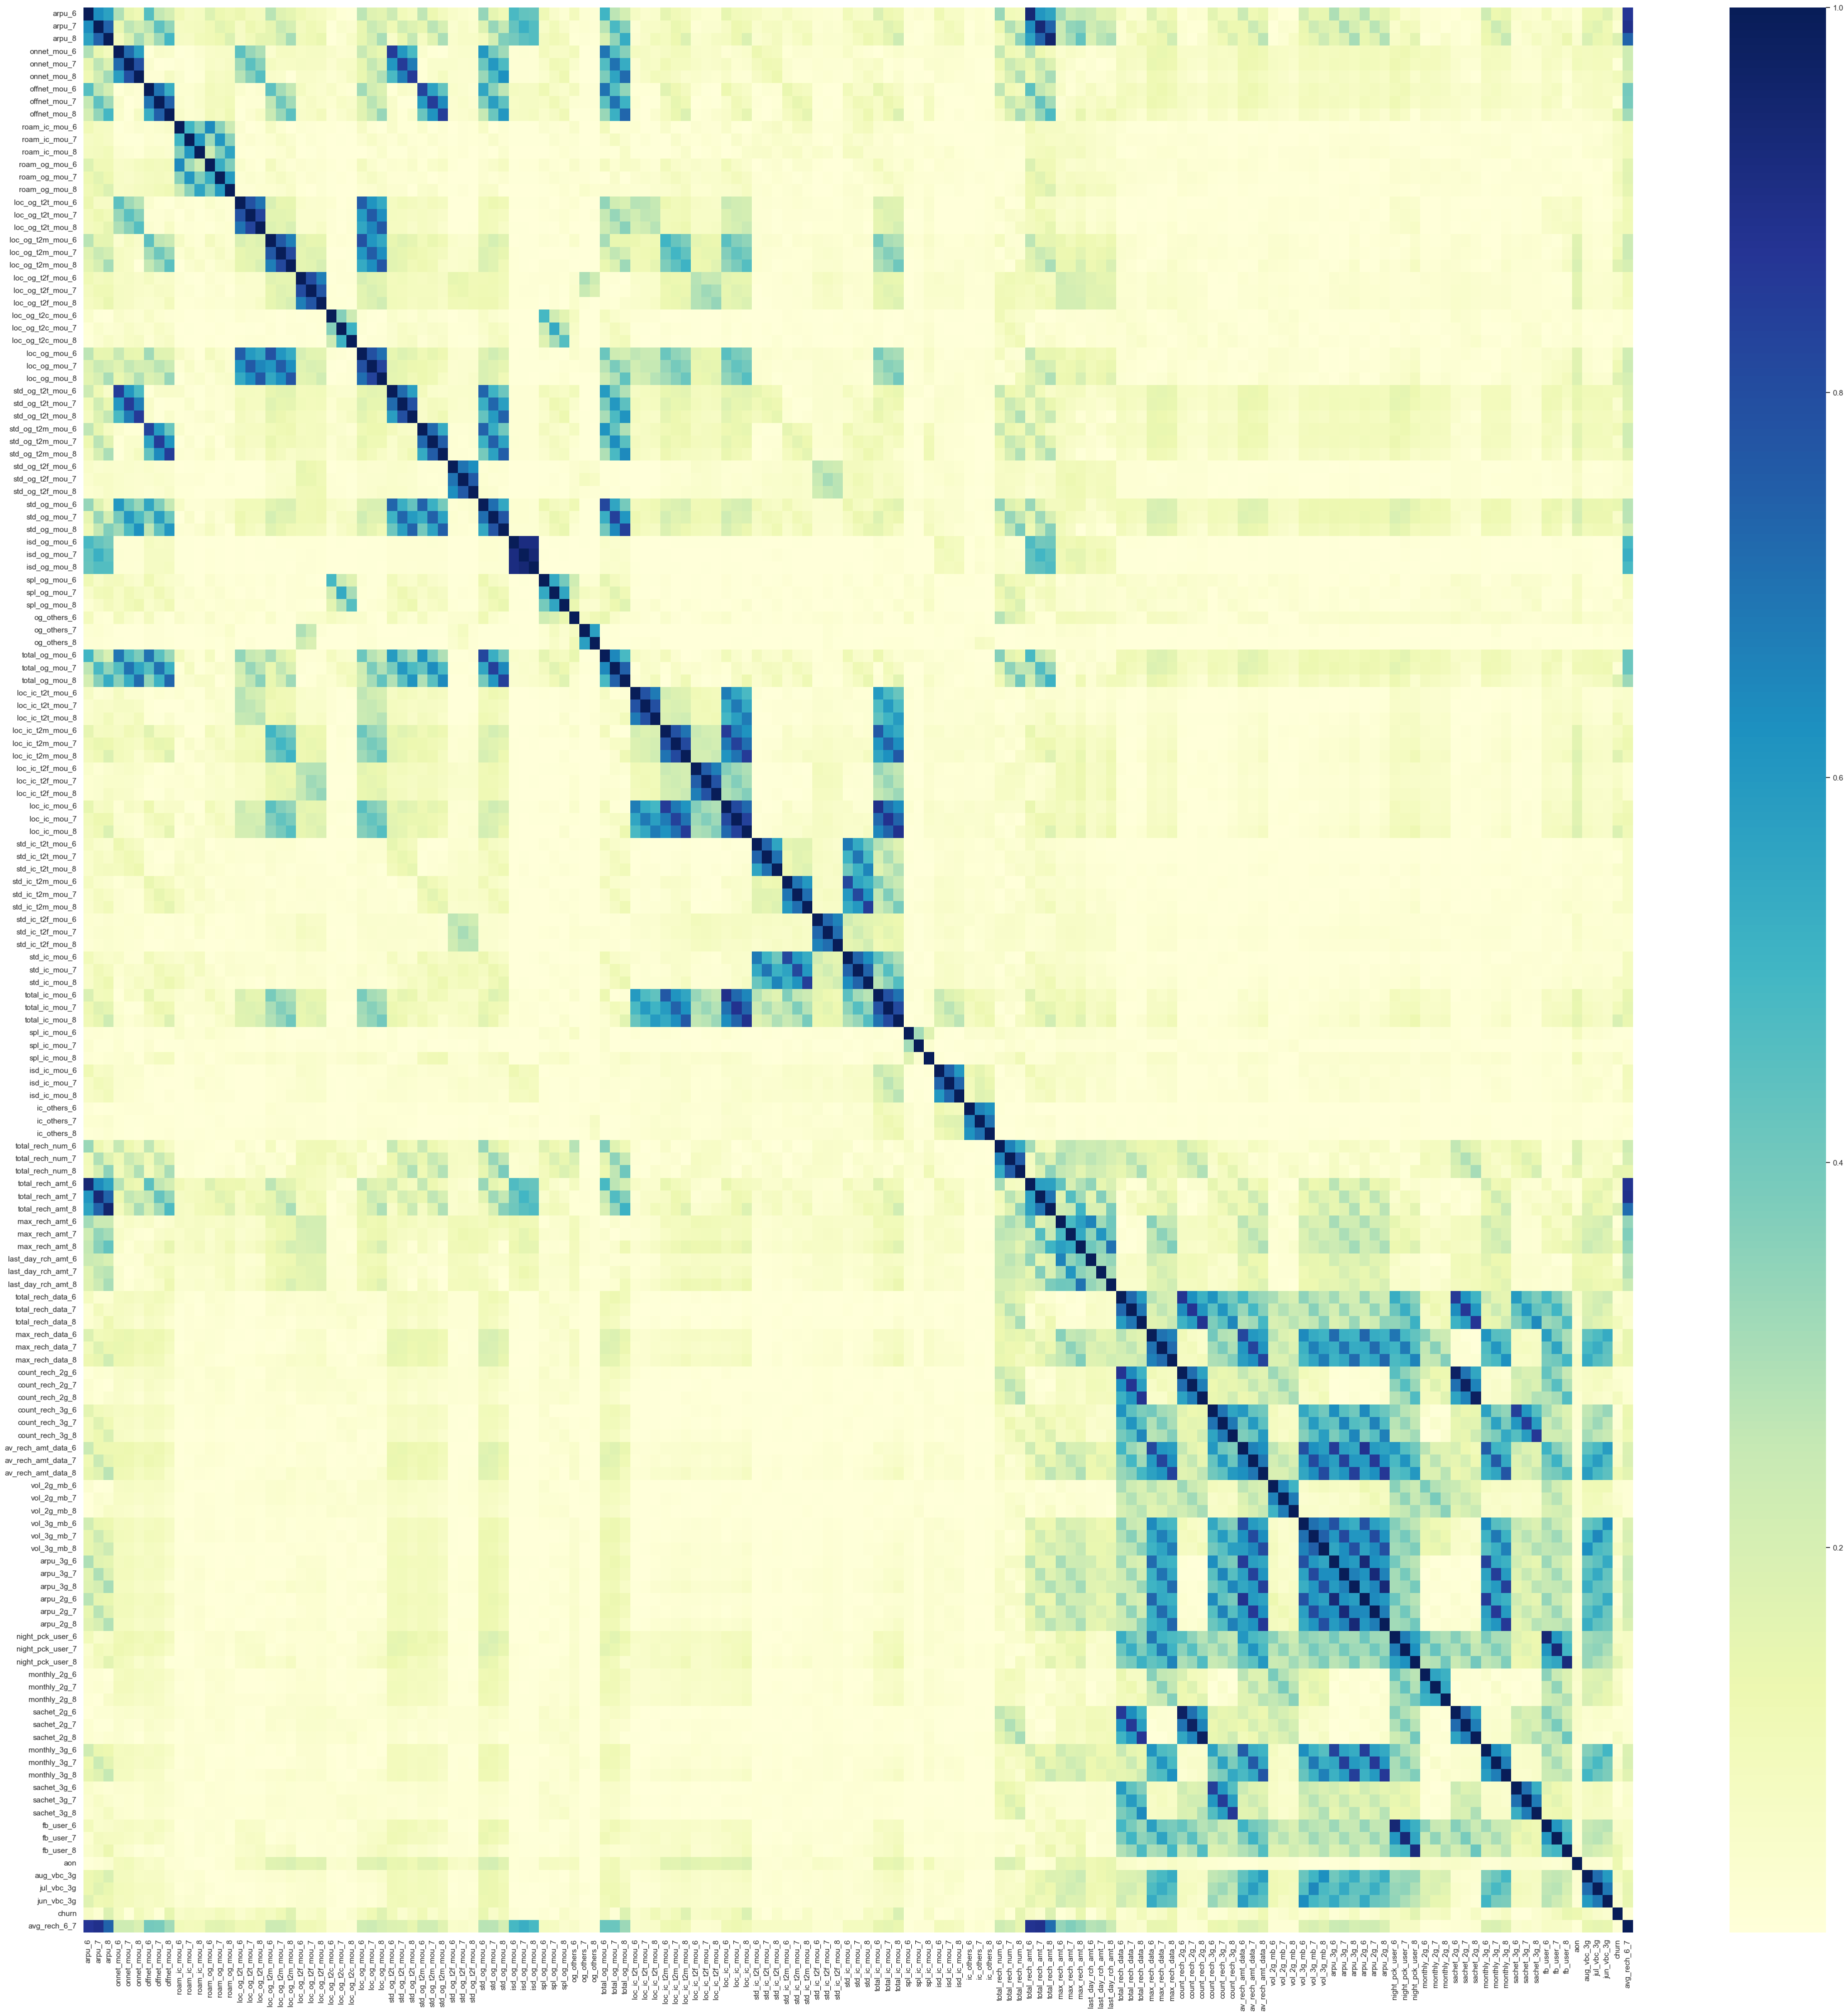

In [29]:
#Creating  correlation matrix
corr_mat = churn.corr().abs()
plt.figure(figsize = (50, 50))
sns.set(font_scale=1)
sns.heatmap(corr_mat, annot = False, cmap="YlGnBu")
plt.show()

From the above, its clear that there are some columns which are having high correlation with the other. These variables does not imply any sort of variance in the model building. Hence we are dropping the columns which are having correlation value greater than 0.7 or 70%

In [30]:
# Select upper triangle of correlation matrix
highCorrCol = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
drophighCorrCol = [column for column in highCorrCol.columns if any(highCorrCol[column] > 0.7)]

drophighCorrCol
#droping the high correlated features 
churn = churn.drop(drophighCorrCol, axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\190677076.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  highCorrCol = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


In [31]:
#Shape of the data frame after droping the highly correalated varaibles
churn.shape

(29979, 67)

* We could see more number of observations between 1 and 3 years.
* Also churn rate is high during this range than the others.

# Outliers Treatment

In [32]:
# Checking Outliers
numerics = ['float64','int64']
churn_num = churn.select_dtypes(include=numerics)
churn_num.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_8,max_rech_data_6,max_rech_data_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,aon,aug_vbc_3g,jun_vbc_3g,churn
count,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,296.23634,418.127743,424.103446,17.428073,13.535270,13.263074,29.348362,22.056425,21.483542,94.733562,181.336751,6.979198,1.567723,1.86379,1.714052,2.012068,2.035893,2.266842,5.920726,7.429822,6.889372,0.693200,0.047651,0.059194,68.771712,159.678675,15.604617,16.238311,32.030383,33.489321,2.876920,0.066736,0.018064,0.027609,11.14435,1.189804,1.478162,12.123253,11.914207,171.471130,175.723006,162.929351,104.558858,105.303379,95.677774,0.936889,1.035425,56.949331,58.716702,0.312118,0.335635,0.313820,78.875263,78.196804,69.248761,1.250709,1.232529,1.226025,0.124954,0.131425,0.114080,1264.158911,129.482436,121.450911,0.08636
std,442.848876,463.049067,460.94123,470.773248,486.710075,79.192826,76.343222,74.588105,118.629898,97.974803,106.294911,236.960935,250.231261,22.671604,6.892348,9.26021,7.401177,12.463715,13.357273,45.942529,18.630406,23.076593,22.903352,2.282437,2.743248,3.322091,158.703140,222.093299,45.847694,78.899714,101.126970,105.834745,19.938857,0.194321,0.182005,0.116422,67.21659,13.994391,15.414578,9.546424,9.605757,174.762549,181.606909,172.671442,142.819031,141.184108,145.319905,2.176824,2.405824,105.849744,108.176034,1.066232,1.176567,1.162114,277.525473,280.430249,268.616268,0.962706,0.967516,0.969349,0.374656,0.387793,0.357335,975.181038,390.625027,389.910814,0.28090
min,-2258.709000,-2014.045000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000
25%,364.352500,365.235000,41.17000,137.340000,135.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.330000,30.290000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


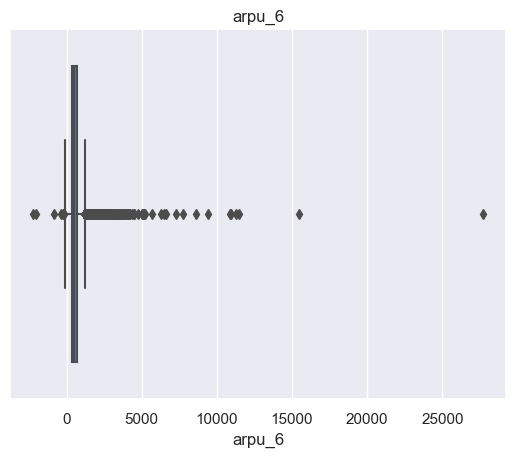

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


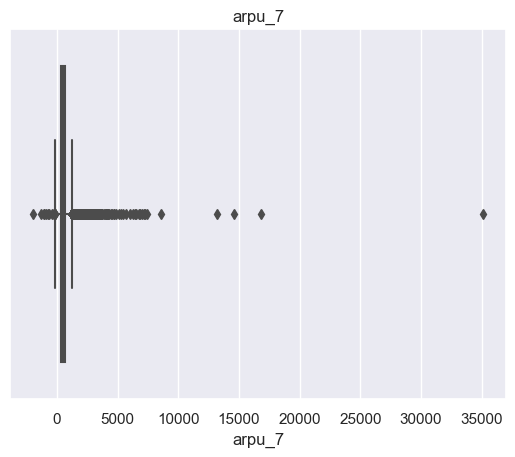

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


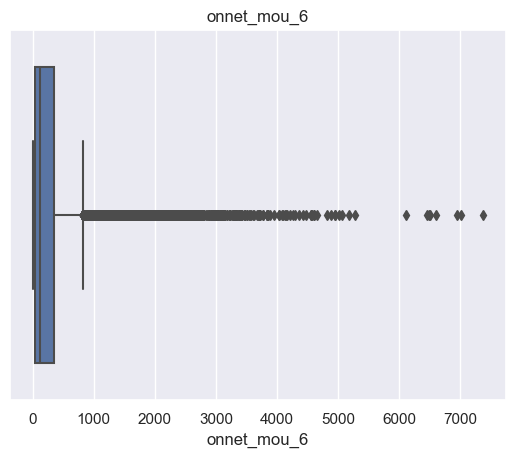

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


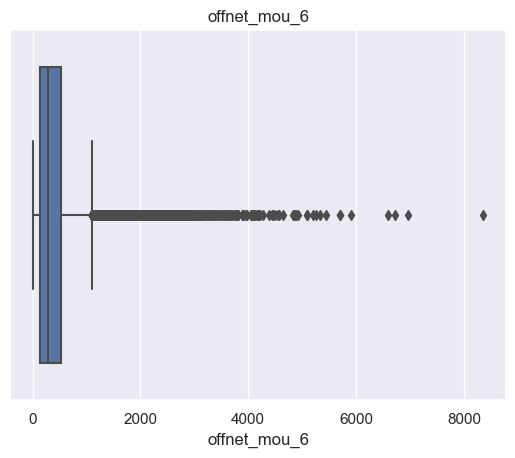

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


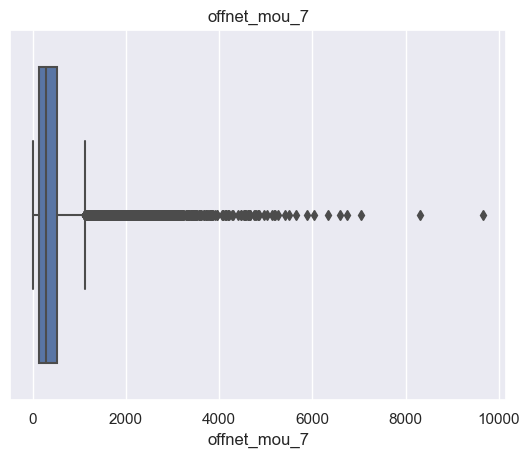

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


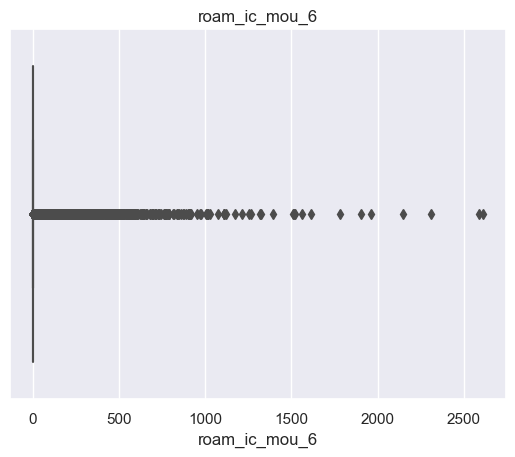

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


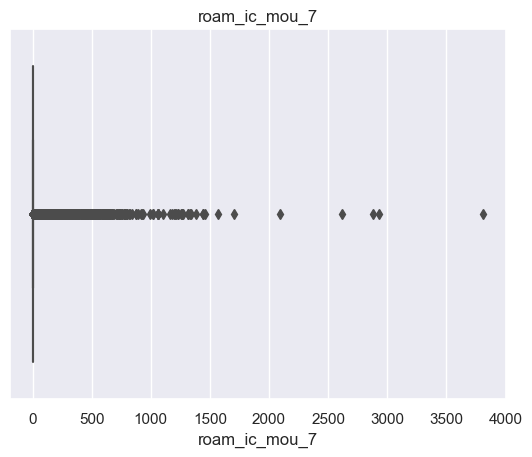

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


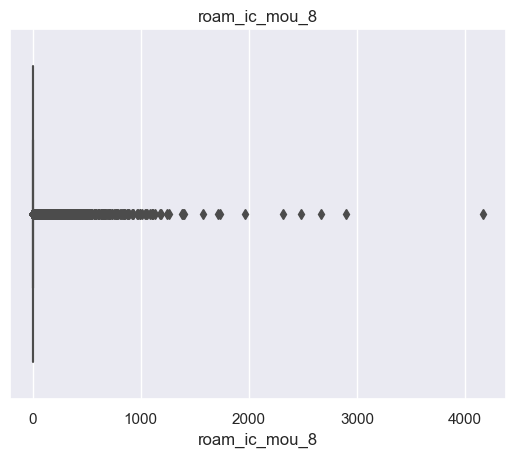

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


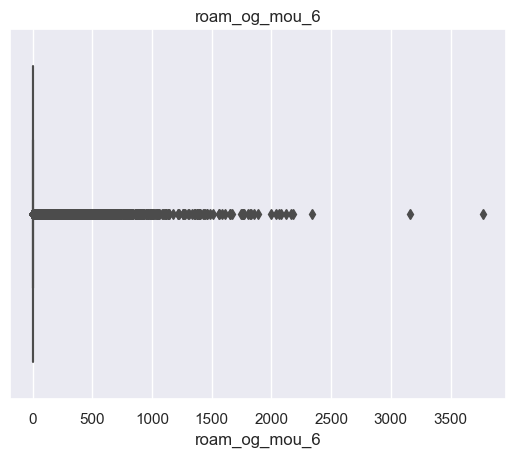

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


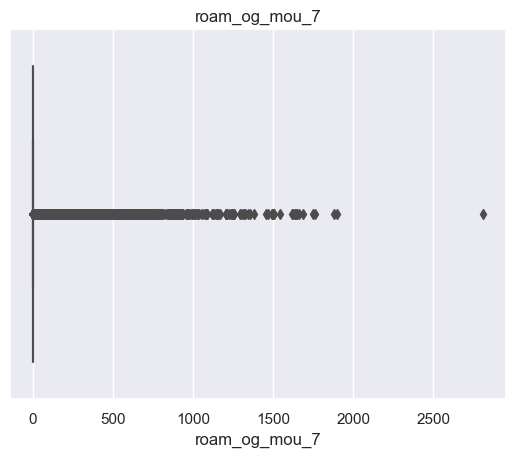

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


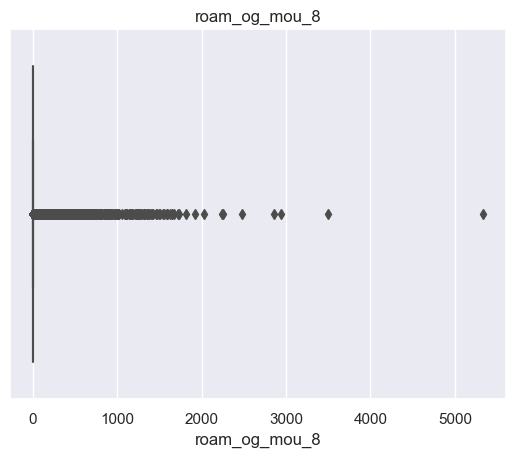

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


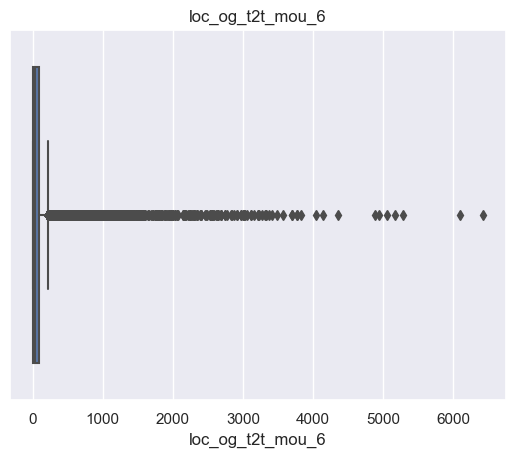

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


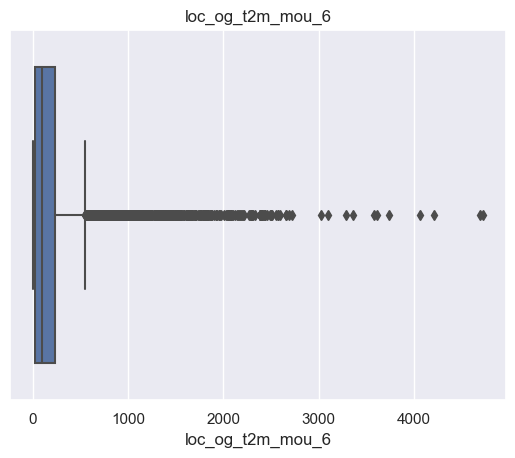

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


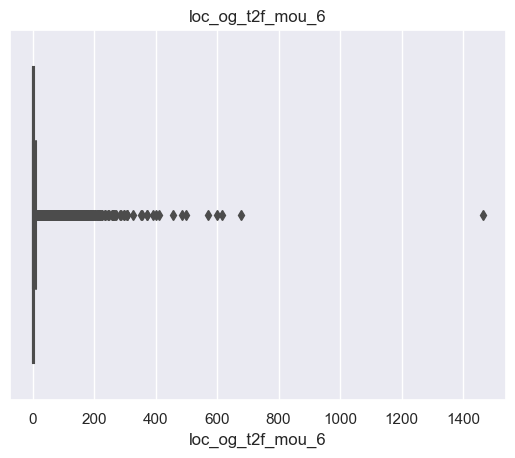

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


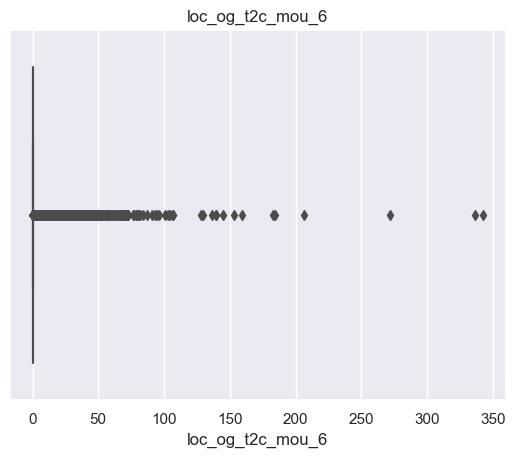

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


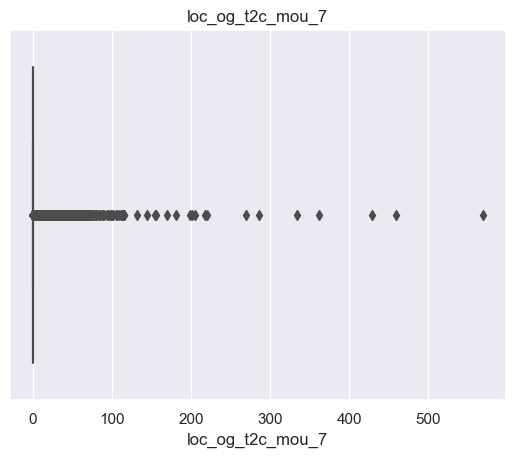

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


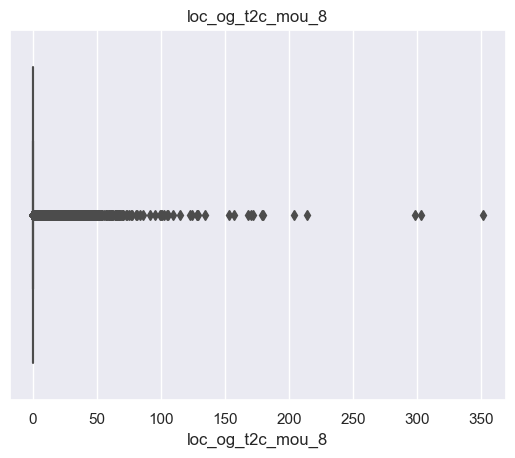

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


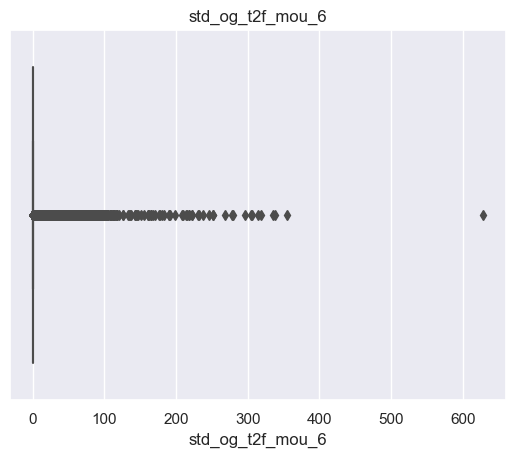

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


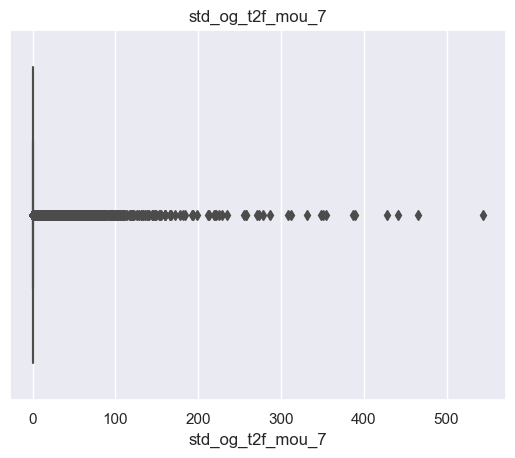

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


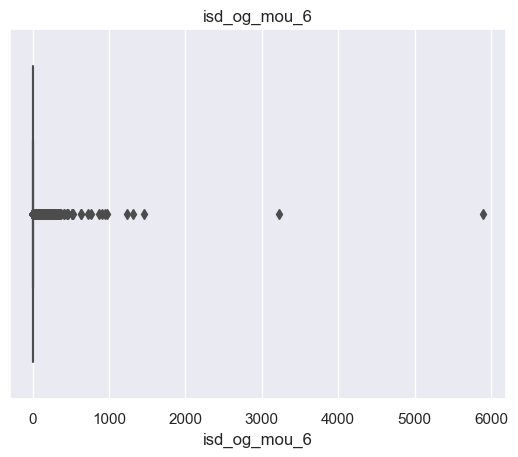

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


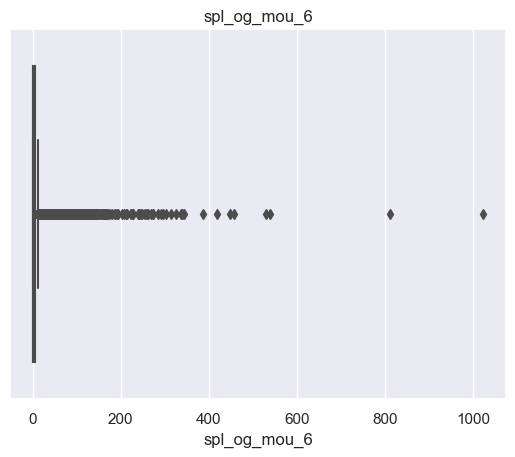

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


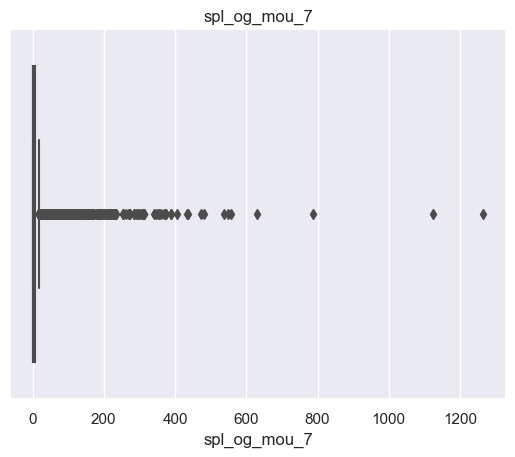

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


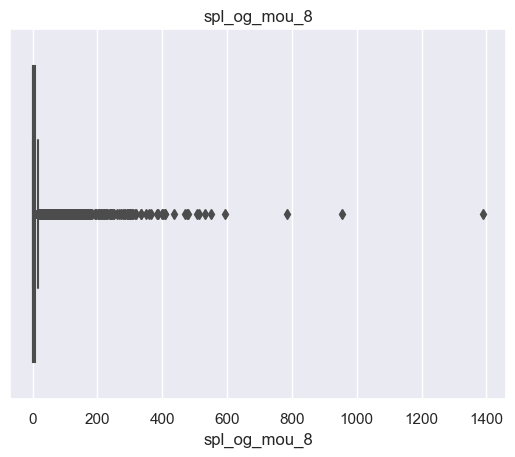

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


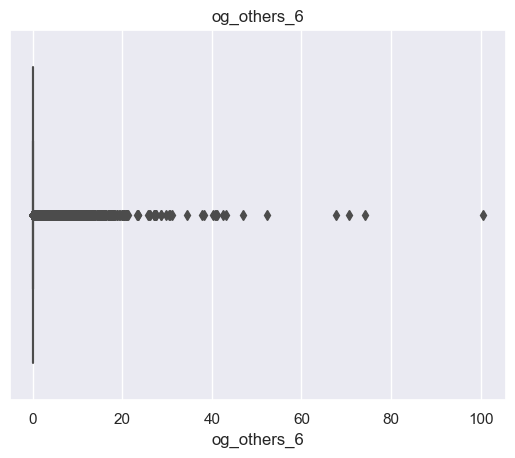

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


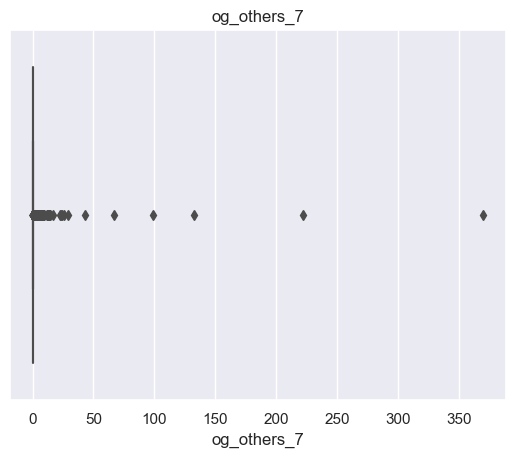

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


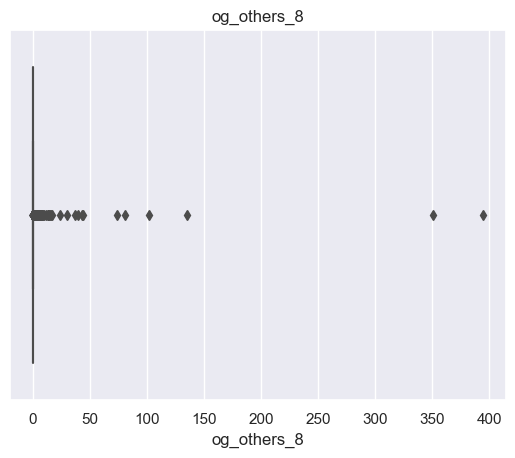

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


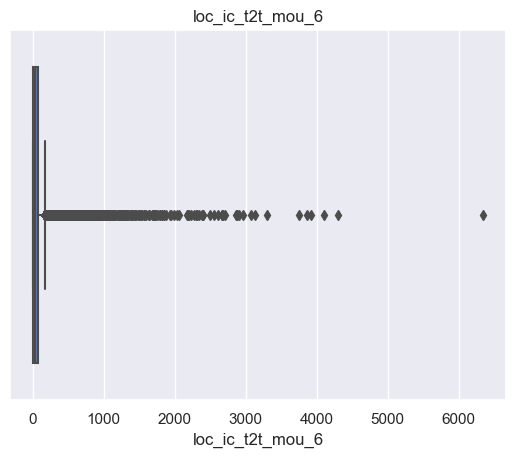

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


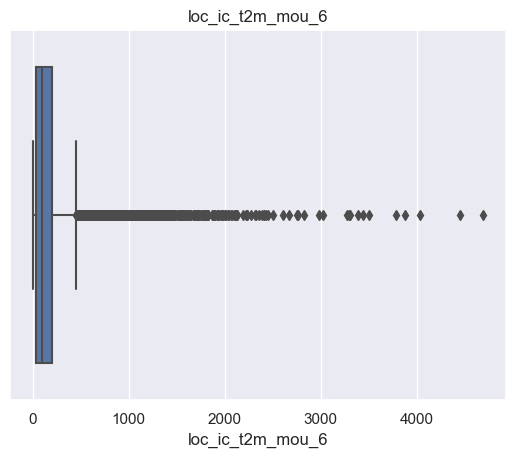

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


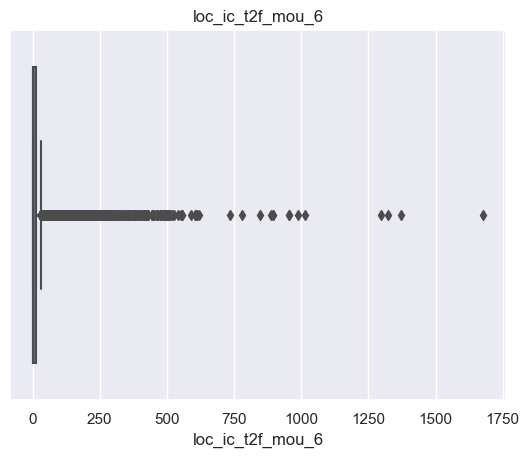

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


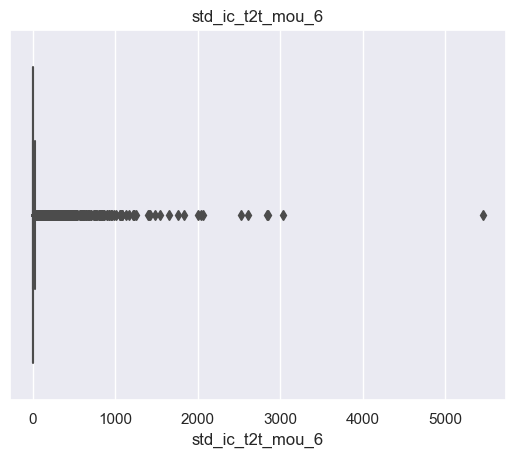

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


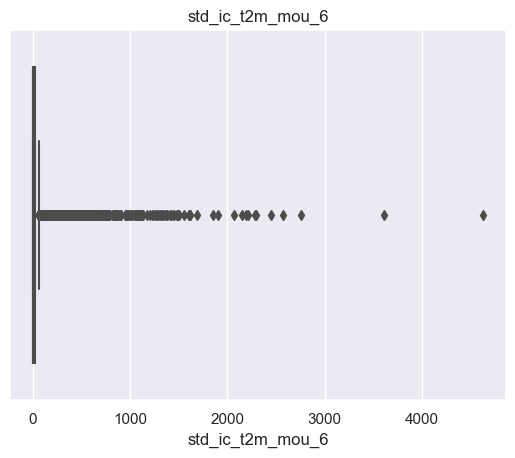

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


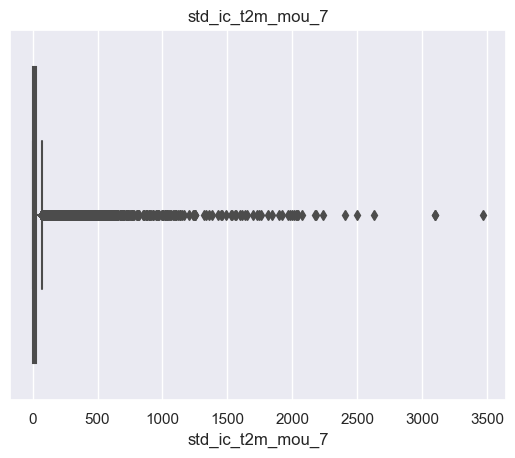

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


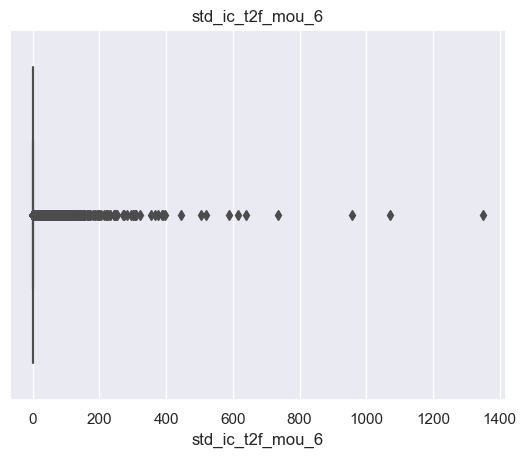

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


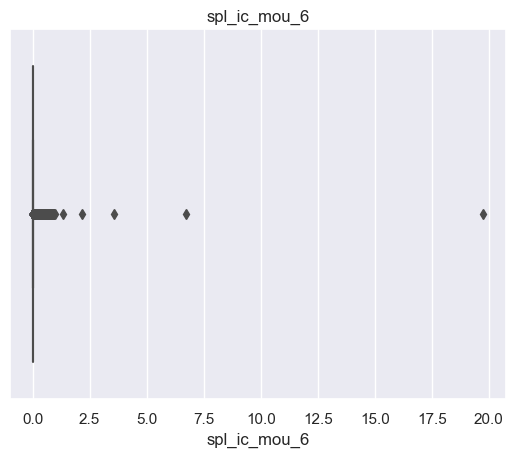

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


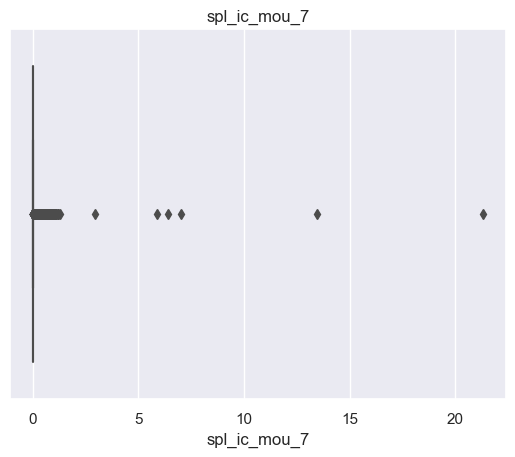

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


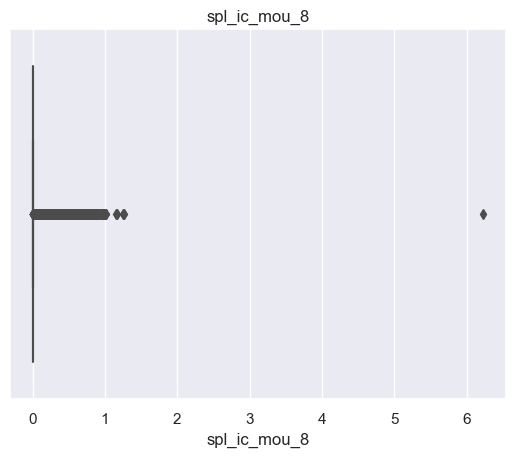

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


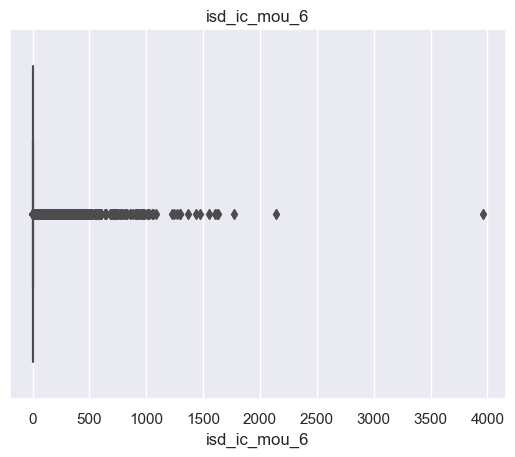

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


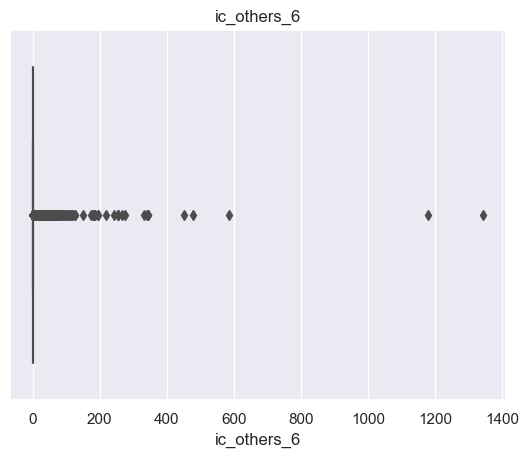

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


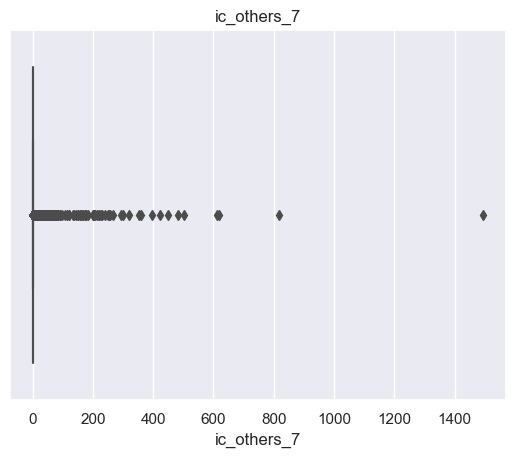

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


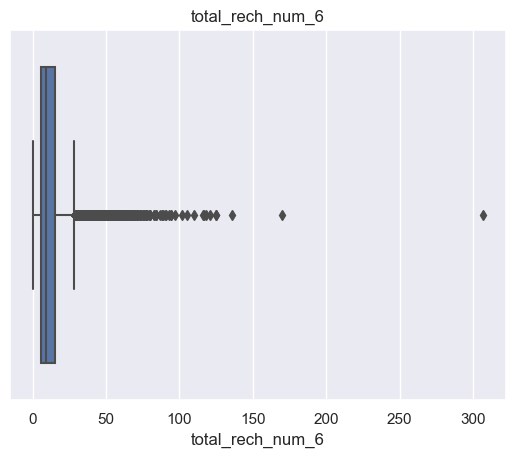

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


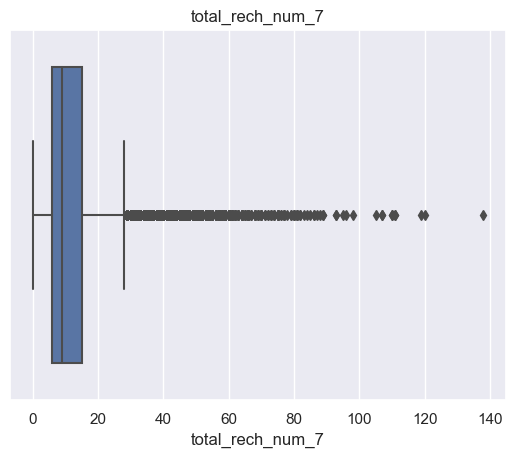

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


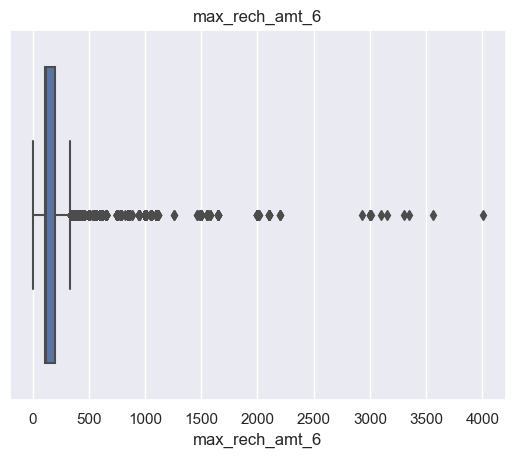

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


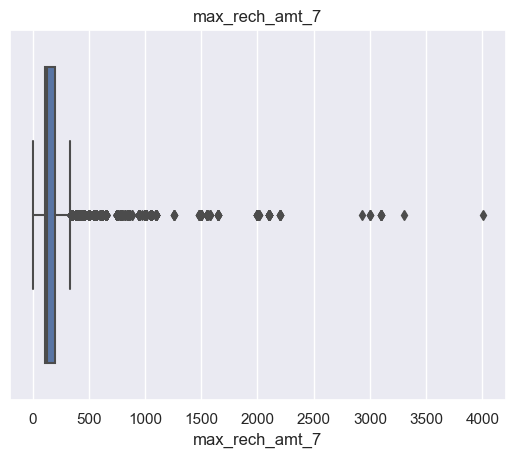

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


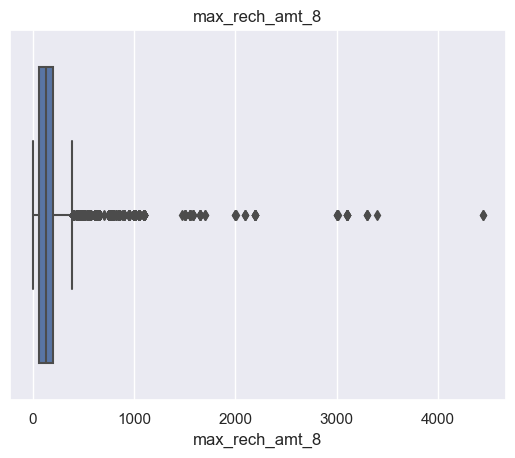

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


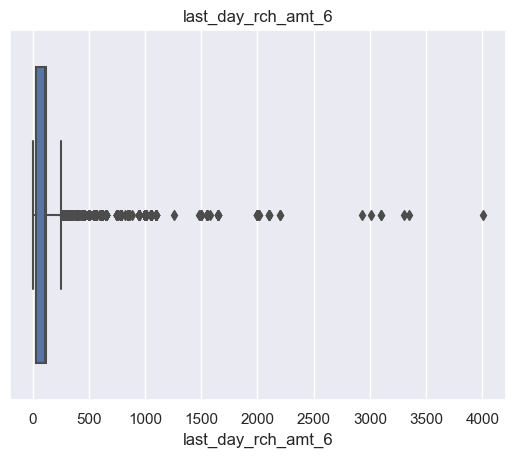

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


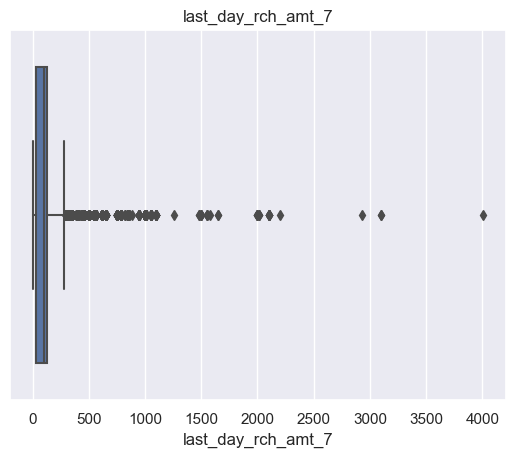

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


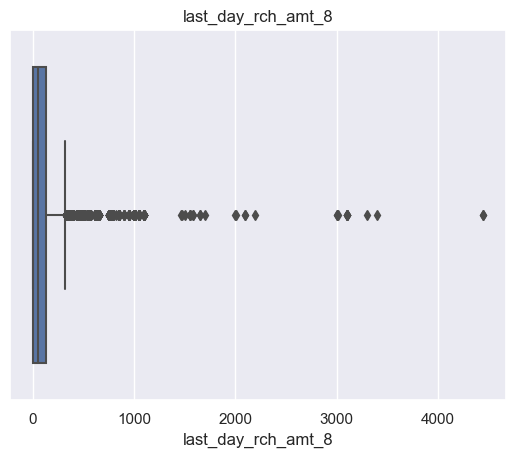

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


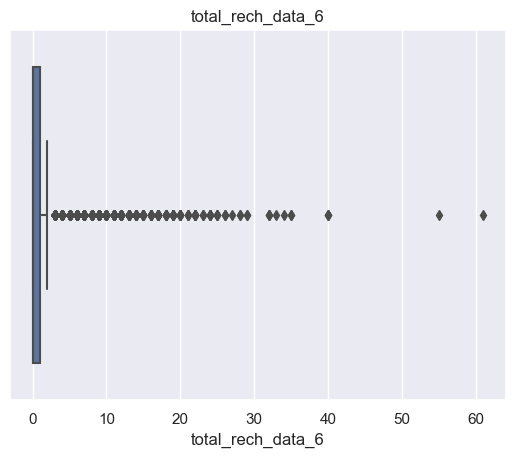

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


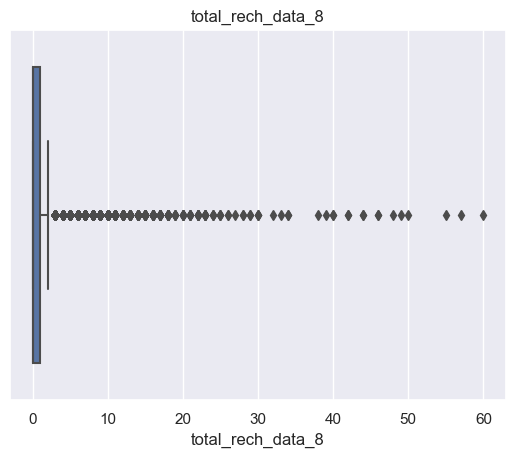

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


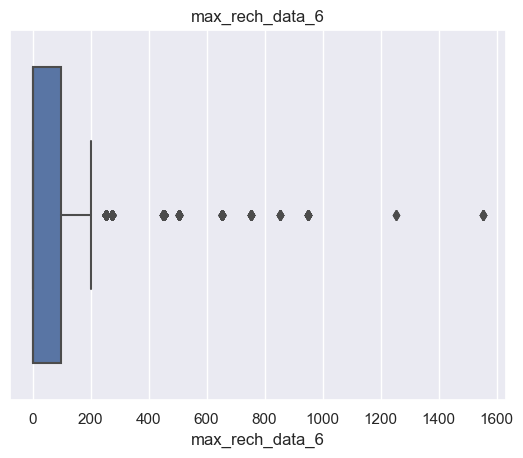

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


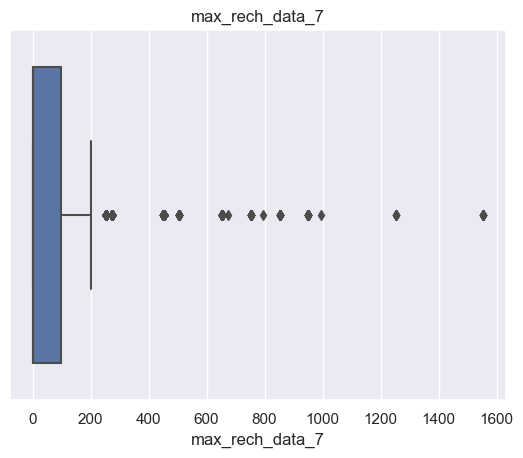

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


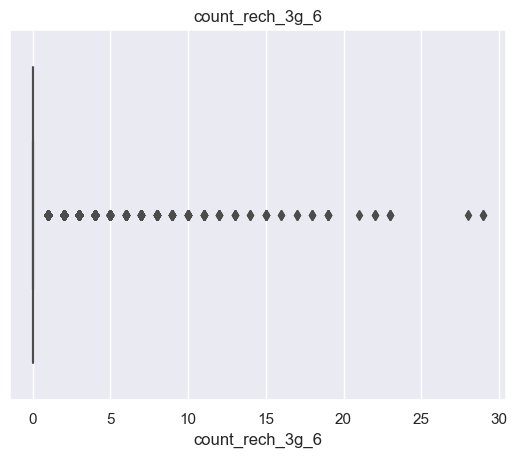

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


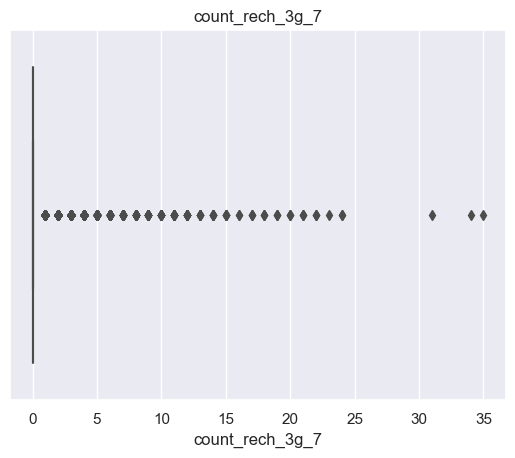

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


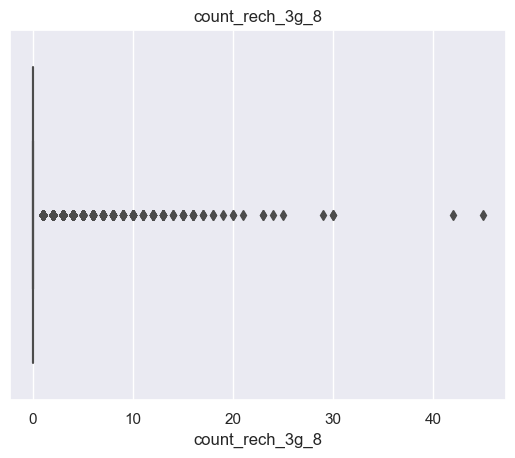

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


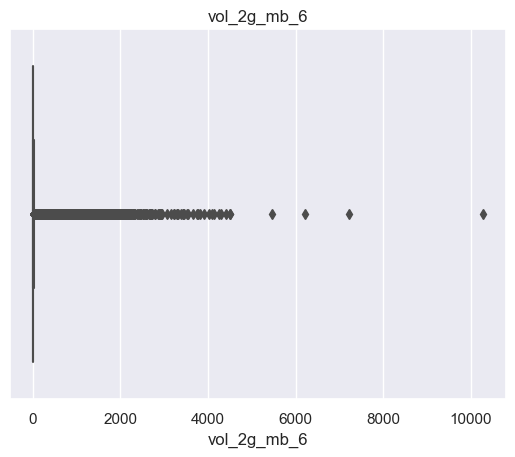

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


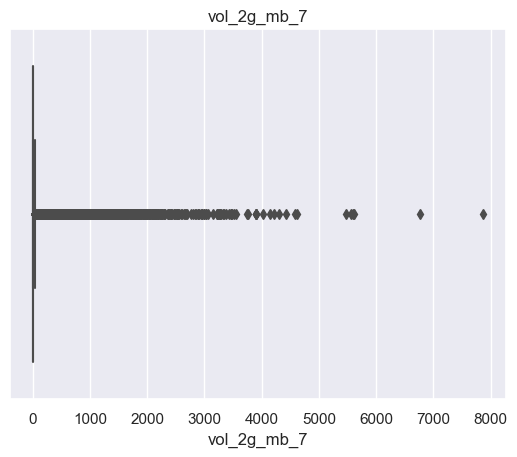

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


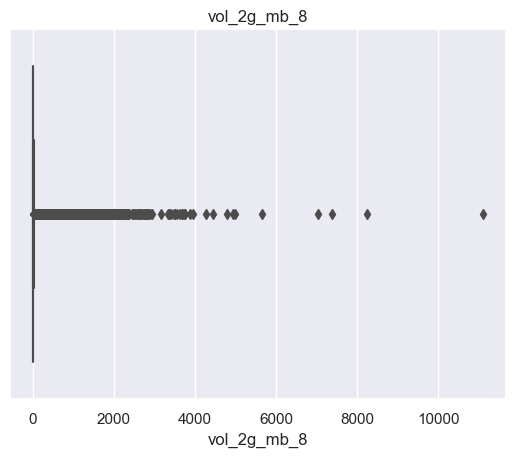

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


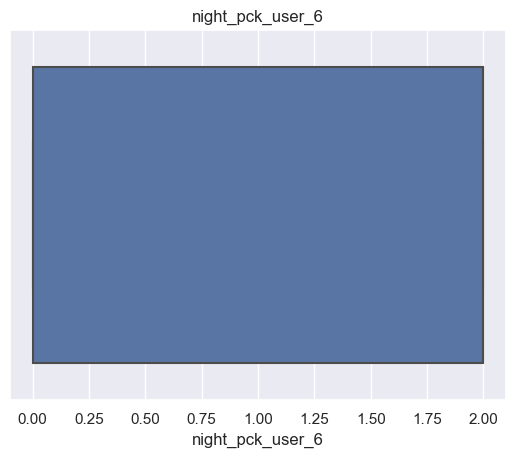

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


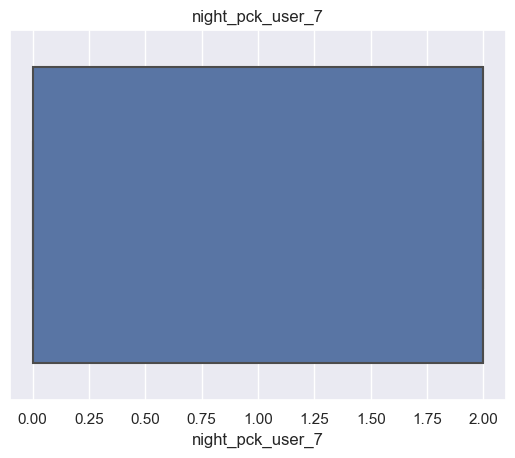

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


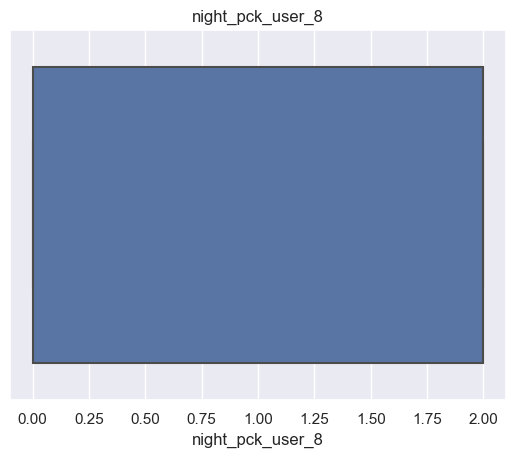

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


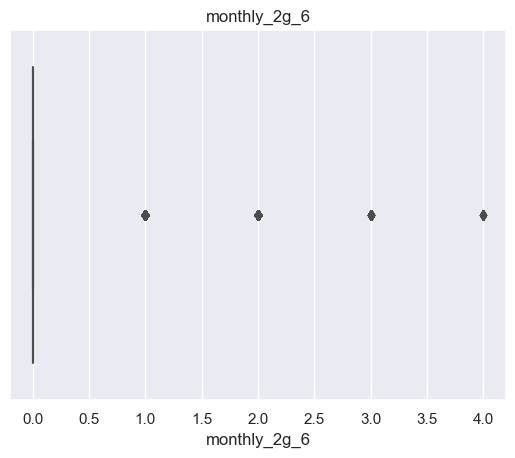

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


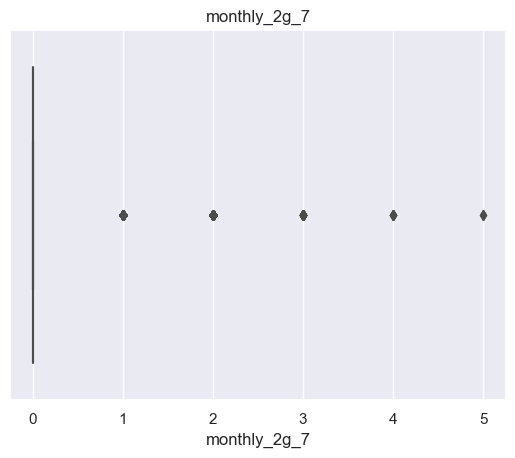

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


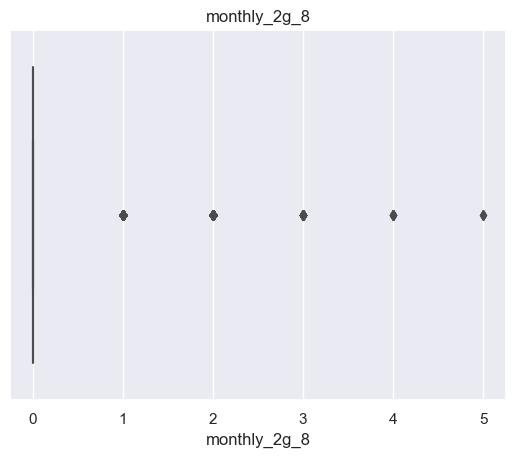

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


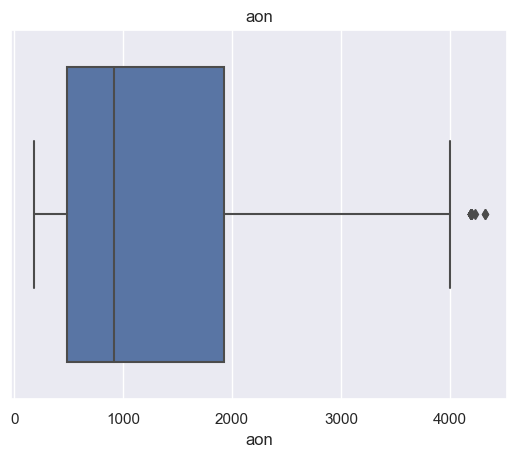

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


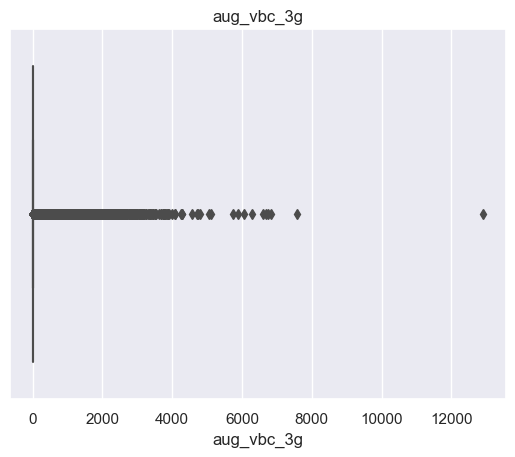

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


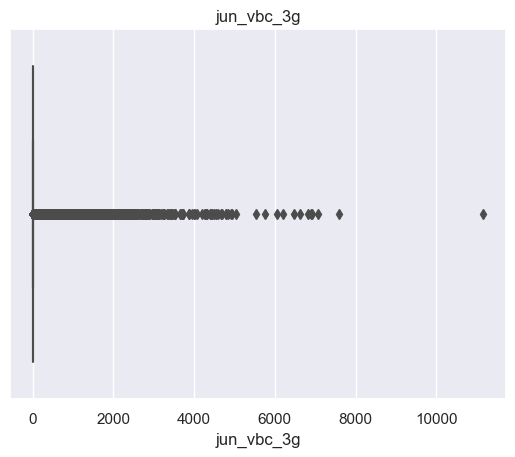

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


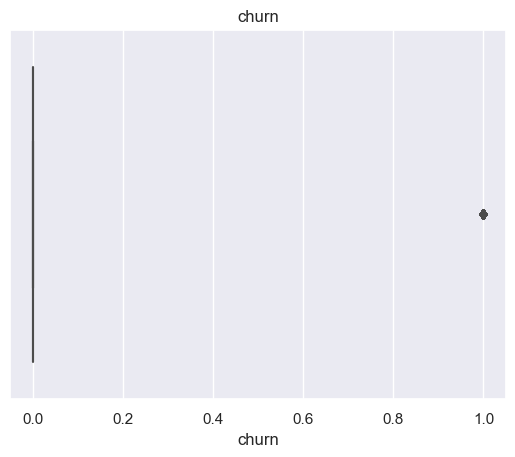

In [33]:
# #Plotting Box Plot
for i in churn_num:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(churn[i],palette="deep")
    plt.title(i)
    plt.show()

In [34]:
# iterate through the columns and cap the values with the 95th percentile
for col in churn_num:
    percentiles = churn[col].quantile([0.05,0.95]).values
    churn[col][churn[col] <= percentiles[0]] = percentiles[0]
    churn[col][churn[col] >= percentiles[1]] = percentiles[1]
churn.shape

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] <= percentiles[0]] = percentiles[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] >= percentiles[1]] = percentiles[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] >= percentiles[1]] = percentiles[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] <= percentiles[0]] = percentiles[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] <= percentiles[0]] = percentiles[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] >= percentiles[1]] = percentiles[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] >= percentiles[1]] = percentiles[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn[col][churn[col] <= percentiles[0]] = percentiles[0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3240\986459547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

(29979, 67)

In [35]:
# Though there are some outliers in the data but removing them will hamper the analysis as volume of data is pretty high
# drop the columns which are no longer needed
#drop_cols = ['total_ic_mou_6','total_og_mou_6','total_ic_mou_7','total_og_mou_7','total_ic_mou_8','total_og_mou_8','vol_2g_mb_6'
#           ,'vol_3g_mb_6','vol_2g_mb_7','vol_3g_mb_7','vol_2g_mb_8','vol_3g_mb_8','onnet_mou_6','onnet_mou_7','onnet_mou_8',
 #           'offnet_mou_6','offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6'
  #          ,'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6',
   #         'loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
#churn.drop(columns=drop_cols,axis=1,inplace=True)
#churn.shape

# Modelling

In [36]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics

### Splitting Data into Training and Test Sets

In [37]:
X = churn.drop(['churn'],axis=1)
# Putting response variable to y
Y = churn['churn']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              29979 non-null  float64
 1   arpu_7              29979 non-null  float64
 2   onnet_mou_6         29979 non-null  float64
 3   offnet_mou_6        29979 non-null  float64
 4   offnet_mou_7        29979 non-null  float64
 5   roam_ic_mou_6       29979 non-null  float64
 6   roam_ic_mou_7       29979 non-null  float64
 7   roam_ic_mou_8       29979 non-null  float64
 8   roam_og_mou_6       29979 non-null  float64
 9   roam_og_mou_7       29979 non-null  float64
 10  roam_og_mou_8       29979 non-null  float64
 11  loc_og_t2t_mou_6    29979 non-null  float64
 12  loc_og_t2m_mou_6    29979 non-null  float64
 13  loc_og_t2f_mou_6    29979 non-null  float64
 14  loc_og_t2c_mou_6    29979 non-null  float64
 15  loc_og_t2c_mou_7    29979 non-null  float64
 16  loc_

In [39]:
#feature standardisation
cols = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=cols)

# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, train_size=0.7,test_size=0.3,random_state=100)

In [40]:
# print shapes of train and test sets
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20985, 66)
(20985,)
(8994, 66)
(8994,)


In [41]:
X_train

,arpu_6,arpu_7,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_8,max_rech_data_6,max_rech_data_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,aon,aug_vbc_3g,jun_vbc_3g
88105,202.181,653.967,2.389,20.64,1287.221,0.000,0.000,0.00,0.000,0.00,0.00,0.00,0.38,0.00,0.00,5.20,0.250,0.00,0.00,0.000,0.00,5.20,5.86,0.00,0.0,0.0,0.00,0.96,0.00,0.000,0.00,15.89,0.00,0.00,0.0,0.00,0.000,0.00,0.00,3,30,36,110,130,0,10,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.0,2.0,2.0,0,0,0,1078.0,0.000,0.00
34588,343.639,516.521,46.490,94.78,97.380,0.000,0.000,0.00,0.000,0.00,0.00,31.74,90.01,4.76,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.0,19.51,69.14,14.64,6.640,1.66,0.00,0.00,0.00,0.0,0.00,0.000,0.00,0.00,9,13,252,252,50,7,23,50,1.0,1.0,252.0,252.0,1.0,1.0,0.0,184.86,80.42,7.53,0.0,0.0,0.0,0,1,1,999.0,137.590,38.36
16623,898.590,498.275,83.060,452.59,476.040,0.000,0.000,0.00,0.000,0.00,0.00,82.48,399.06,31.69,0.00,0.00,0.000,0.00,0.00,0.000,23.51,18.63,4.63,0.00,0.0,0.0,27.46,147.43,50.93,0.000,0.80,2.69,0.38,0.00,0.0,0.00,46.433,0.00,0.09,14,4,250,250,289,0,0,0,2.0,2.0,154.0,154.0,0.0,0.0,1.0,30.04,73.91,106.02,0.0,0.0,0.0,1,1,1,2926.0,819.257,681.19
54904,443.943,687.776,205.290,255.83,1254.280,0.000,0.000,0.00,0.000,0.00,0.00,123.56,218.56,2.03,0.00,0.13,0.000,0.00,0.00,0.000,1.71,2.01,6.31,0.00,0.0,0.0,134.86,152.81,0.00,0.630,7.64,19.08,0.00,0.00,0.0,0.00,0.000,0.00,0.00,5,12,128,128,144,128,128,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.0,2.0,2.0,0,0,0,1359.0,0.000,0.00
33555,472.184,310.180,4.260,1132.39,711.140,1.030,0.000,0.00,1.850,0.00,0.00,4.26,8.83,0.00,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.0,0.0,5.88,29.51,0.00,4.600,20.98,6.70,0.00,0.28,0.0,0.00,0.000,0.95,0.00,8,4,110,110,144,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.0,2.0,2.0,0,0,0,389.0,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40270,317.771,403.045,19.660,157.44,159.940,0.000,0.000,0.00,0.000,0.00,0.00,19.66,149.86,0.60,5.78,0.00,5.110,0.00,0.00,0.000,7.23,3.39,8.86,0.66,0.0,0.0,14.66,95.44,4.04,0.000,0.00,0.00,0.50,0.00,0.0,0.25,0.000,0.00,0.16,20,18,36,152,202,10,10,50,4.0,3.0,25.0,152.0,0.0,1.0,2.0,29.63,380.39,274.62,0.0,0.0,0.0,0,0,0,258.0,601.450,159.36
81475,373.863,402.393,287.180,60.11,51.280,0.000,0.000,0.00,0.000,0.00,0.00,0.15,15.63,0.00,0.00,0.00,9.331,0.00,0.00,0.000,1.78,0.66,30.23,1.08,0.0,0.0,2.13,12.69,0.00,1.140,0.21,4.64,0.00,0.00,0.0,0.00,0.000,0.00,0.00,21,19,36,98,30,20,20,20,0.0,1.0,0.0,98.0,0.0,0.0,0.0,0.00,0.14,0.97,2.0,0.0,0.0,0,0,0,532.0,0.000,0.00
47213,945.926,370.928,523.340,216.28,21.930,0.000,0.000,0.00,0.000,0.00,0.00,33.26,39.38,1.11,0.16,0.00,0.180,0.00,0.00,0.000,1.83,10.59,28.96,4.14,0.0,0.0,18.76,55.81,7.34,64.986,34.44,4.15,0.00,0.00,0.0,0.00,0.000,0.00,0.00,30,19,102,36,144,30,20,130,1.0,0.0,33.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,2.0,2.0,0,0,0,844.0,0.000,0.00
77813,202.181,258.830,36.630,109.79,105.010,0.000,53.590,27.84,0.000,15.34,40.19,32.53,41.14,13.23,0.00,0.00,0.000,7.04

In [42]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Interpretability Model - Logistic Regression

In [43]:
import statsmodels.api as sm

m1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
print(m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20920
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4298.3
Date:                Fri, 31 Mar 2023   Deviance:                       8596.7
Time:                        19:14:00   Pearson chi2:                 2.05e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1561
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6113      0.055    -65.520      0.0

In [44]:
#Predicted values on the train set
Y_train_pred = m1.predict(sm.add_constant(X_train))
Y_train_pred[:10]

array([0.00805251, 0.06659593, 0.00547888, 0.04991092, 0.06757141,
       0.03609956, 0.08407021, 0.00210113, 0.04004112, 0.18985852])

In [45]:
Y_train_pred_final = pd.DataFrame({'Churn':Y_train.values, 'Churn_Prob':Y_train_pred})
Y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.008053
1,0,0.066596
2,0,0.005479
3,0,0.049911
4,0,0.067571


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [46]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.008053,0
1,0,0.066596,0
2,0,0.005479,0
3,0,0.049911,0
4,0,0.067571,0


In [47]:
#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Churn, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[18994   217]
 [ 1373   401]]


In [48]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Churn, Y_train_pred_final.Predicted))

0.9242315939957112


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


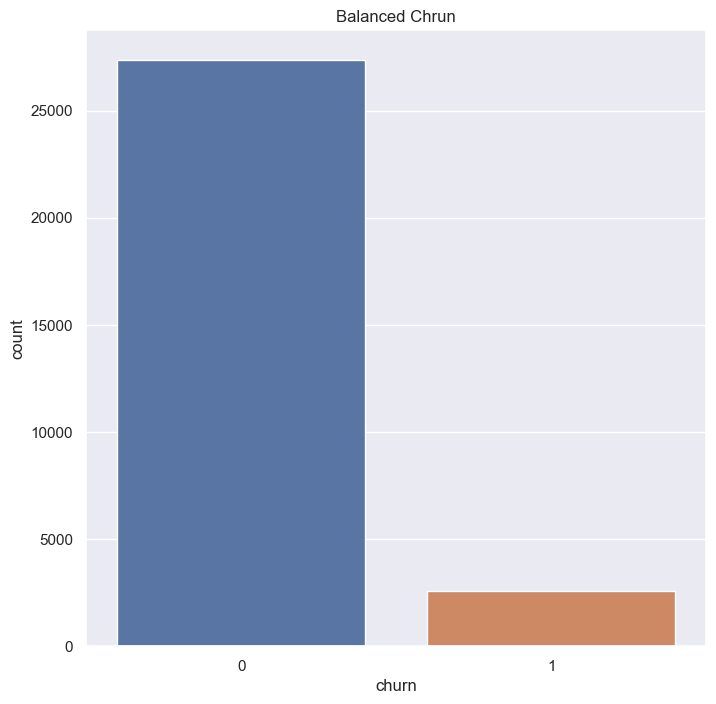

In [49]:
#plot chrun and non chrun values
plt.figure(figsize=(8, 8))
sns.countplot('churn', data=churn)
plt.title('Balanced Chrun')
plt.show()

In [50]:
print('%age of Non-Churn Customers: ', round(churn['churn'].value_counts()[0]/len(churn) * 100,2))
print('%age of Churn Customers: ' , round(churn['churn'].value_counts()[1]/len(churn) * 100,2))

%age of Non-Churn Customers:  91.36
%age of Churn Customers:  8.64


From the result of logistic regression we can say the dataset is imbalance

    To reduce class imbalance we will use below two techanique:
    UnderSampling
    Synthetic Minority Over-sampling Technique(SMOTE)

In [51]:
# Shuffle the Dataset.
shuffled_df = churn.sample(frac=1,random_state=4)

# amount of Churn customer 2441  rows.
churn_df = shuffled_df.loc[shuffled_df['churn'] == 1]

#Randomly select 2441  observations.
non_churn_df = shuffled_df.loc[shuffled_df['churn'] == 0].sample(n=2441,random_state=42)
normalized_df = pd.concat([churn_df, non_churn_df])

In [52]:
#check rows and columns of newly created dataframe 
normalized_df.shape

(5030, 67)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


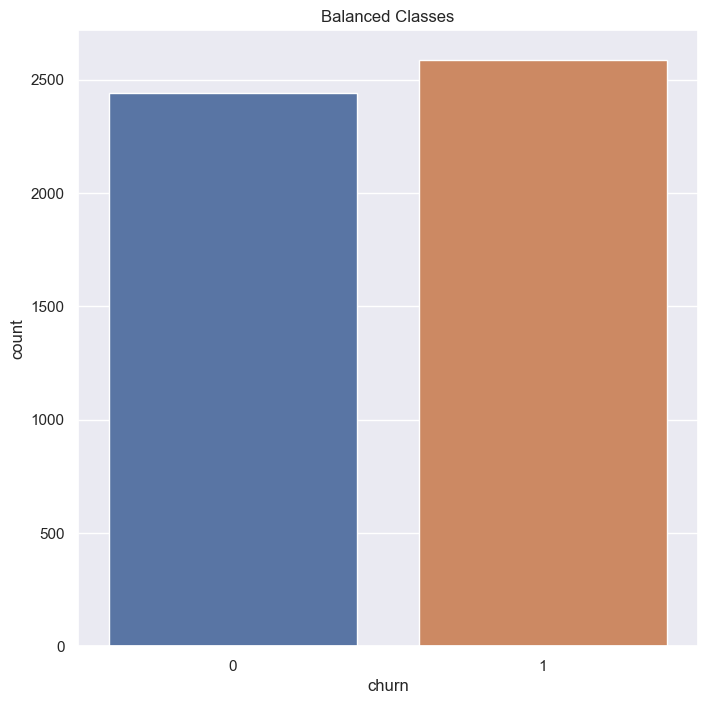

In [53]:
plt.figure(figsize=(8, 8))
sns.countplot('churn', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [54]:
# Putting feature variable to X_un
X_un = normalized_df.drop(['churn'],axis=1)

# Putting response variable to y_un
y_un = normalized_df['churn']

In [55]:
#feature standardisation
scaler = StandardScaler()
X_un_scaled = scaler.fit_transform(X_un)
X_un_scaled = pd.DataFrame(X_un, columns=X_un.columns)

In [56]:
#putting data into train and test set
X_un_train, X_un_test, y_un_train, y_un_test = train_test_split(X_un_scaled,y_un, train_size=0.7,test_size=0.3,random_state=100)

In [57]:
#build logistic regression
logr_underSapmling = LogisticRegression()
logr_underSapmling.fit(X_un_train,y_un_train)
y_pred_underSapmling =logr_underSapmling.predict(X_un_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#check confusion matrix
conf_underSapmling = metrics.confusion_matrix(y_un_test,y_pred_underSapmling)
print(conf_underSapmling)

[[561 154]
 [162 632]]


## Metrics - Logistic regression - Undersampling

In [59]:
#True positive 
TP = conf_underSapmling[1,1] 
#True negatives
TN = conf_underSapmling[0,0] 
#False positives
FP = conf_underSapmling[0,1] 
#False negatives
FN = conf_underSapmling[1,0]
#Sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
#Specificity of the model
specificity = TN / float(TN+FP)
print("Accuracy : {}".format(metrics.accuracy_score(y_un_test,y_pred_underSapmling.round())))
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)


Accuracy : 0.7905897945659377
Sensitivity:  0.7959697732997482
Specificity:  0.7846153846153846


### Applying PCA

In [60]:
# Importing the PCA module
from sklearn.decomposition import PCA

# apply pca to train data
pca = PCA(svd_solver = 'randomized',random_state=42)
pca_churn_train = pca.fit_transform(X_train)

In [61]:
# creating data frame with PC's
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Features':colnames})
pcs_df.head()

,PC1,PC2,Features
0,0.069996,0.100883,arpu_6
1,0.076418,0.086758,arpu_7
2,-0.074290,-0.001361,onnet_mou_6
3,-0.040478,0.119065,offnet_mou_6
4,-0.042209,0.102051,offnet_mou_7


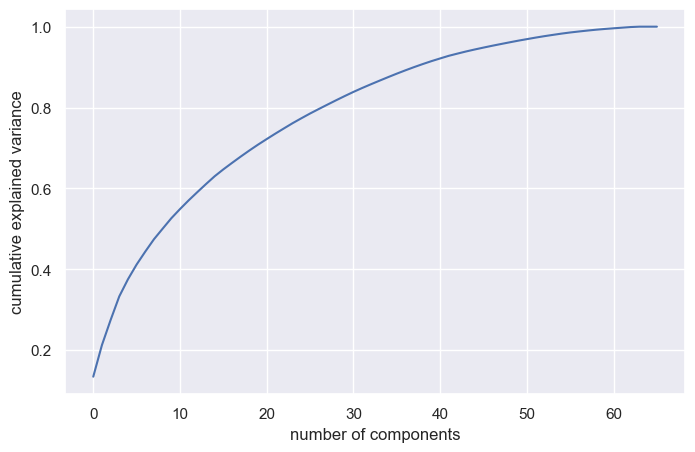

In [62]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
# Initialize pca with 10 components
pca = PCA(n_components=50)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

In [64]:
#first 10 components expalins the maximum variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

10 components accounts for 90%  where as 15 components accounts for 98%

In [65]:
'''
Method Name : evaluate_model
Input(s)    : 2 series
Output(s)   : 4 float values  
Description :
- This method gets 2 series (actual and predicted) as inputs and compute the accuracy, ROC, Precision and Recall scores  
- Then returns the computed scores. 
'''
def evaluate_model(actual, pred):
    from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

In [66]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [67]:
# List to store the model scores
model_score_list = []

In [68]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score :  90.88
ROC AUC score :  58.09
Precision score :  49.16
Recall score :  18.04


In [69]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced')
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'DecisionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  86.91
ROC AUC score :  57.73
Precision score :  24.93
Recall score :  22.09


In [70]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', class_weight='balanced')
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'SVC_Kernel_rbf', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  86.88
ROC AUC score :  80.97
Precision score :  38.35
Recall score :  73.74


In [71]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced')
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  91.28
ROC AUC score :  53.39
Precision score :  68.24
Recall score :  7.12


In [72]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
2,SVC_Kernel_rbf,86.88,80.97,38.35,73.74
1,DecisionTreeClassifier,86.91,57.73,24.93,22.09
0,KNeighborsClassifier,90.88,58.09,49.16,18.04
3,RandomForestClassifier,91.28,53.39,68.24,7.12


### Save the ML Model

In [73]:
# Save the model
import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 

['model.pkl']

### Load the ML Model

In [74]:
# Load the model from the file 
rf_pickle_model = joblib.load('model.pkl') 